In [4]:
!pip install chromedriver_binary==87.0.4280.88

  Created wheel for chromedriver-binary: filename=chromedriver_binary-87.0.4280.88.0-py3-none-any.whl size=8021239 sha256=2b2d0bc43756c704e8413691fa0abd8973dc07ca275c9f8e3904b533a11f5b04
  Stored in directory: /Users/mossa/Library/Caches/pip/wheels/42/cc/29/ea2afb1e0c45eebd7a64e15bdf4a43d794433587dc50c90abb
Successfully built chromedriver-binary


In [46]:
#import vital tools
from selenium import webdriver
import chromedriver_binary
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'
%matplotlib inline

#browser open (chrome)
browser=webdriver.Chrome(r"/Users/mossa/github/CyberAgent_stock_predict/chromedriver")

#ready for scraping
columnNames=[]
ETFComparisonsTable=[]
for num in range(99):
    browser.get("https://kabuoji3.com/stock/")
    stockSearch=browser.find_element_by_class_name("form_inputs")
    stockSearchForm=stockSearch.find_element_by_class_name("form_txt")
    stockSearchForm.send_keys("ETF")
    btnClick=browser.find_element_by_class_name("btn_submit")
    btnClick.click()

    #choose a stock out of list
    stockClick=browser.find_elements_by_class_name("clickable")
    if stockClick[num] == stockClick[-1]:
        break
    stockClick[num].find_element_by_tag_name("a").click()

    stockTable=browser.find_element_by_class_name("table_wrap")
    stockLine=stockTable.find_elements_by_tag_name("tr")

    #price scraping with calculation
    if len(stockLine)==302:
        ETFComparisons=[]
        for i in range(2,152):
            stockETFPriceAfter=stockLine[i-1].find_elements_by_tag_name("td")
            stockETFPriceBefore=stockLine[i].find_elements_by_tag_name("td")
            ETFComparison=float(stockETFPriceAfter[6].text)-float(stockETFPriceBefore[6].text)
            ETFComparisons.append(ETFComparison)

        stockETFPriceAfter=stockLine[151].find_elements_by_tag_name("td")
        stockETFPriceBefore=stockLine[153].find_elements_by_tag_name("td")
        ETFComparison=float(stockETFPriceAfter[6].text)-float(stockETFPriceBefore[6].text)
        ETFComparisons.append(ETFComparison)

        for i in range(154,302):
            stockETFPriceAfter=stockLine[i-1].find_elements_by_tag_name("td")
            stockETFPriceBefore=stockLine[i].find_elements_by_tag_name("td")
            ETFComparison=float(stockETFPriceAfter[6].text)-float(stockETFPriceBefore[6].text)
            ETFComparisons.append(ETFComparison)

        ETFComparisonsTable.append(ETFComparisons)

        #pick up title
        stockTitleBox=browser.find_element_by_class_name("base_box_ttl")
        stockTitle=stockTitleBox.find_element_by_class_name("jp").text
        columnNames.append(stockTitle)

#making ETF table
ETFTable=pd.DataFrame(ETFComparisonsTable)
ETFTable=ETFTable.T
ETFTable.columns=columnNames
#checking ETF table
ETFTable.head()

,1329 iシェアーズ・コア 日経225ETF,1364 ｉシェアーズ JPX日経400 ETF,1385 UBS ETF ユーロ圏大型株50(E･ストックス50),1386 UBS ETF 欧州株(MSCIヨーロッパ),1389 UBS ETF 英国大型株100(FTSE 100),1391 UBS ETF スイス株(MSCIスイス20/35),1393 UBS ETF 米国株(MSCI米国),1394 UBS ETF 先進国株(MSCIワールド),1458 楽天 ETF-日経レバレッジ指数連動型,1473 One ETF トピックス,...,1552 国際のETF VIX短期先物指数,1575 ChinaAMC CSI 300 Index ETF-JDR,1576 南方 FTSE 中国A株 50 ETF,1577 (NEXT FUNDS)野村日本株高配当70連動型ETF,1655 iシェアーズ S&P500 米国株 ETF,1656 iシェアーズ･コア 米国債7-10年 ETF,1658 iシェアーズ･コア MSCI 新興国株 ETF,2516 東証マザーズETF,2522 iシェアーズ オートメーション&ロボット ETF,2555 東証REIT ETF
0,20.0,50.0,15.0,-30.0,150.0,10.0,0.0,-440.0,50.0,3.0,...,-60.0,29.0,-4.0,100.0,3.0,2.0,6.0,1.0,10.0,10.0
1,250.0,110.0,95.0,110.0,240.0,15.0,400.0,-140.0,260.0,18.0,...,-560.0,-22.0,6.0,-10.0,20.0,2.0,11.0,33.0,65.0,18.0
2,-310.0,-200.0,-60.0,-80.0,-40.0,-54.0,-100.0,-50.0,-330.0,-32.0,...,580.0,-8.0,-9.0,-290.0,-29.0,-3.0,-37.0,-40.0,-35.0,0.0
3,-60.0,-80.0,-60.0,-150.0,-270.0,-11.0,-100.0,540.0,-100.0,-4.0,...,40.0,-2.0,-11.0,-100.0,2.0,-1.0,6.0,-7.0,0.0,-7.0
4,-50.0,-10.0,0.0,30.0,20.0,0.0,100.0,310.0,-30.0,-1.0,...,30.0,-3.0,16.0,60.0,4.0,4.0,-2.0,5.0,10.0,-8.0


In [47]:
#date scraping
browser.get("https://kabuoji3.com/stock/{}/".format(4751))
stockTable=browser.find_element_by_class_name("table_wrap")
stockLine=stockTable.find_elements_by_tag_name("tr")
dates=[]
for i in range(1,152):
    stockDate=stockLine[i].find_elements_by_tag_name("td")
    stockDate=stockDate[0].text
    dates.append(stockDate)
for i in range(153,302):
    stockDate=stockLine[i].find_elements_by_tag_name("td")
    stockDate=stockDate[0].text
    dates.append(stockDate)
df_date=pd.DataFrame()
df_date["date"]=dates
df_date["year"]=df_date["date"].apply(lambda x:int(x.split("-")[0]))
df_date["month"]=df_date["date"].apply(lambda x:int(x.split("-")[1]))
df_date["day"]=df_date["date"].apply(lambda x:int(x.split("-")[2]))
df_date.head()

,date,year,month,day
0,2020-12-25,2020,12,25
1,2020-12-24,2020,12,24
2,2020-12-22,2020,12,22
3,2020-12-21,2020,12,21
4,2020-12-18,2020,12,18


In [48]:
#stock scraping (comparison with yesterday)
browser.get("https://kabuoji3.com/stock/{}/".format(4751))
stockTable=browser.find_element_by_class_name("table_wrap")
stockLine=stockTable.find_elements_by_tag_name("tr")
targetStockComparisons=[]
for i in range(2,152):
    targetStockPriceAfter=stockLine[i-1].find_elements_by_tag_name("td")
    targetStockPriceBefore=stockLine[i].find_elements_by_tag_name("td")
    targetStockComparison=float(targetStockPriceAfter[6].text)-float(targetStockPriceBefore[6].text)
    targetStockComparisons.append(targetStockComparison)
targetStockPriceAfter=stockLine[151].find_elements_by_tag_name("td")
targetStockPriceBefore=stockLine[153].find_elements_by_tag_name("td")
targetStockComparison=float(targetStockPriceAfter[6].text)-float(targetStockPriceBefore[6].text)
targetStockComparisons.append(targetStockComparison)
for i in range(154,302):
    targetStockPriceAfter=stockLine[i-1].find_elements_by_tag_name("td")
    targetStockPriceBefore=stockLine[i].find_elements_by_tag_name("td")
    targetStockComparison=float(targetStockPriceAfter[6].text)-float(targetStockPriceBefore[6].text)
    targetStockComparisons.append(targetStockComparison)
df=pd.DataFrame(targetStockComparisons)
df.columns=["サイバーエージェント：前日比"]
df.head()

,サイバーエージェント：前日比
0,-20.0
1,210.0
2,-250.0
3,50.0
4,-10.0


In [49]:
#add table
stockPriceTable=pd.concat([df_date,ETFTable],axis=1)
stockPriceTable=pd.concat([stockPriceTable,df],axis=1)
stockPriceTable.head()

,date,year,month,day,1329 iシェアーズ・コア 日経225ETF,1364 ｉシェアーズ JPX日経400 ETF,1385 UBS ETF ユーロ圏大型株50(E･ストックス50),1386 UBS ETF 欧州株(MSCIヨーロッパ),1389 UBS ETF 英国大型株100(FTSE 100),1391 UBS ETF スイス株(MSCIスイス20/35),...,1575 ChinaAMC CSI 300 Index ETF-JDR,1576 南方 FTSE 中国A株 50 ETF,1577 (NEXT FUNDS)野村日本株高配当70連動型ETF,1655 iシェアーズ S&P500 米国株 ETF,1656 iシェアーズ･コア 米国債7-10年 ETF,1658 iシェアーズ･コア MSCI 新興国株 ETF,2516 東証マザーズETF,2522 iシェアーズ オートメーション&ロボット ETF,2555 東証REIT ETF,サイバーエージェント：前日比
0,2020-12-25,2020,12,25,20.0,50.0,15.0,-30.0,150.0,10.0,...,29.0,-4.0,100.0,3.0,2.0,6.0,1.0,10.0,10.0,-20.0
1,2020-12-24,2020,12,24,250.0,110.0,95.0,110.0,240.0,15.0,...,-22.0,6.0,-10.0,20.0,2.0,11.0,33.0,65.0,18.0,210.0
2,2020-12-22,2020,12,22,-310.0,-200.0,-60.0,-80.0,-40.0,-54.0,...,-8.0,-9.0,-290.0,-29.0,-3.0,-37.0,-40.0,-35.0,0.0,-250.0
3,2020-12-21,2020,12,21,-60.0,-80.0,-60.0,-150.0,-270.0,-11.0,...,-2.0,-11.0,-100.0,2.0,-1.0,6.0,-7.0,0.0,-7.0,50.0
4,2020-12-18,2020,12,18,-50.0,-10.0,0.0,30.0,20.0,0.0,...,-3.0,16.0,60.0,4.0,4.0,-2.0,5.0,10.0,-8.0,-10.0


In [50]:
#prepare for making target values
df_next=df.copy()
df_next.columns=["サイバーエージェント：翌日比"]

#date scraping for target values
browser.get("https://kabuoji3.com/stock/{}/".format(4751))
stockTable=browser.find_element_by_class_name("table_wrap")
stockLine=stockTable.find_elements_by_tag_name("tr")
dates=[]
for i in range(2,152):
    stockDate=stockLine[i].find_elements_by_tag_name("td")
    stockDate=stockDate[0].text
    dates.append(stockDate)
for i in range(153,302):
    stockDate=stockLine[i].find_elements_by_tag_name("td")
    stockDate=stockDate[0].text
    dates.append(stockDate)
df_date2=pd.DataFrame()
df_date2["date"]=dates

#making target values table
df_next=pd.concat([df_date2,df_next],axis=1)
df_next.index=df_date2["date"]

#prepare for complete table
table=stockPriceTable[1:299].copy()
table.index=table["date"]

#making complete table
table["サイバーエージェント：翌日比"]=df_next["サイバーエージェント：翌日比"]
table.tail()

,date,year,month,day,1329 iシェアーズ・コア 日経225ETF,1364 ｉシェアーズ JPX日経400 ETF,1385 UBS ETF ユーロ圏大型株50(E･ストックス50),1386 UBS ETF 欧州株(MSCIヨーロッパ),1389 UBS ETF 英国大型株100(FTSE 100),1391 UBS ETF スイス株(MSCIスイス20/35),...,1576 南方 FTSE 中国A株 50 ETF,1577 (NEXT FUNDS)野村日本株高配当70連動型ETF,1655 iシェアーズ S&P500 米国株 ETF,1656 iシェアーズ･コア 米国債7-10年 ETF,1658 iシェアーズ･コア MSCI 新興国株 ETF,2516 東証マザーズETF,2522 iシェアーズ オートメーション&ロボット ETF,2555 東証REIT ETF,サイバーエージェント：前日比,サイバーエージェント：翌日比
date,,,,,,,,,,,,,,,,,,,,,
2019-10-08,2019-10-08,2019,10,8,240.0,80.0,80.0,-50.0,20.0,29.0,...,-8.0,150.0,20.0,6.0,15.0,7.0,30.0,-2.0,-60.0,-70.0
2019-10-07,2019-10-07,2019,10,7,-30.0,80.0,0.0,-10.0,30.0,20.0,...,0.0,-30.0,20.0,0.0,3.0,-3.0,5.0,11.0,50.0,-60.0
2019-10-04,2019-10-04,2019,10,4,60.0,20.0,10.0,0.0,-30.0,0.0,...,0.0,-440.0,12.0,2.0,12.0,10.0,13.0,8.0,45.0,50.0
2019-10-03,2019-10-03,2019,10,3,-430.0,-320.0,-100.0,-40.0,10.0,-70.0,...,3.0,-290.0,-56.0,-1.0,-22.0,-11.0,-36.0,3.0,-90.0,45.0
2019-10-02,2019-10-02,2019,10,2,-140.0,70.0,-75.0,80.0,130.0,-12.0,...,9.0,-150.0,-42.0,3.0,-25.0,1.0,-40.0,-40.0,-130.0,-90.0


In [51]:
#making csv file
table.to_csv("stockPriceData.csv",index=False)

In [52]:
#import vital tools
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from selenium import webdriver
import requests
import json

#reading csv file (*ETF=Exhange Traded Funds)
train=pd.read_csv("stockPriceData.csv")
train.head()

,date,year,month,day,1329 iシェアーズ・コア 日経225ETF,1364 ｉシェアーズ JPX日経400 ETF,1385 UBS ETF ユーロ圏大型株50(E･ストックス50),1386 UBS ETF 欧州株(MSCIヨーロッパ),1389 UBS ETF 英国大型株100(FTSE 100),1391 UBS ETF スイス株(MSCIスイス20/35),...,1576 南方 FTSE 中国A株 50 ETF,1577 (NEXT FUNDS)野村日本株高配当70連動型ETF,1655 iシェアーズ S&P500 米国株 ETF,1656 iシェアーズ･コア 米国債7-10年 ETF,1658 iシェアーズ･コア MSCI 新興国株 ETF,2516 東証マザーズETF,2522 iシェアーズ オートメーション&ロボット ETF,2555 東証REIT ETF,サイバーエージェント：前日比,サイバーエージェント：翌日比
0,2020-12-24,2020,12,24,250.0,110.0,95.0,110.0,240.0,15.0,...,6.0,-10.0,20.0,2.0,11.0,33.0,65.0,18.0,210.0,-20.0
1,2020-12-22,2020,12,22,-310.0,-200.0,-60.0,-80.0,-40.0,-54.0,...,-9.0,-290.0,-29.0,-3.0,-37.0,-40.0,-35.0,0.0,-250.0,210.0
2,2020-12-21,2020,12,21,-60.0,-80.0,-60.0,-150.0,-270.0,-11.0,...,-11.0,-100.0,2.0,-1.0,6.0,-7.0,0.0,-7.0,50.0,-250.0
3,2020-12-18,2020,12,18,-50.0,-10.0,0.0,30.0,20.0,0.0,...,16.0,60.0,4.0,4.0,-2.0,5.0,10.0,-8.0,-10.0,50.0
4,2020-12-17,2020,12,17,80.0,70.0,20.0,50.0,0.0,0.0,...,-20.0,-30.0,10.0,-6.0,6.0,28.0,20.0,3.0,150.0,-10.0


In [53]:
df = pd.read_csv("stockPriceData.csv")
dfd = df.reset_index().T.reset_index().T.values.tolist().pop(0)
del dfd[0:5]
print(dfd)

['1329 iシェアーズ・コア 日経225ETF', '1364 ｉシェアーズ JPX日経400 ETF', '1385 UBS ETF ユーロ圏大型株50(E･ストックス50)', '1386 UBS ETF 欧州株(MSCIヨーロッパ)', '1389 UBS ETF 英国大型株100(FTSE 100)', '1391 UBS ETF スイス株(MSCIスイス20/35)', '1393 UBS ETF 米国株(MSCI米国)', '1394 UBS ETF 先進国株(MSCIワールド)', '1458 楽天 ETF-日経レバレッジ指数連動型', '1473 One ETF トピックス', '1474 One ETF JPX日経400', '1475 iシェアーズ・コア TOPIX ETF', '1476 iシェアーズ・コア Ｊリート ETF', '1477 iシェアーズ MSCI 日本株最小分散 ETF', '1478 iシェアーズ MSCI ジャパン高配当利回り ETF', '1482 iシェアーズ・コア 米国債7-10年ETF(H有)', '1483 iシェアーズ JPX/S&P 設備･人材投資ETF', '1484 One ETF JPX/S&P 設備･人材投資指数', '1493 One ETF JPX日経中小型', '1494 One ETF 高配当日本株', '1496 iシェアーズ 米ドル建て投資適格社債ETF(H有)', '1497 iシェアーズ 米ドル建ハイイールド社債ETF(H有)', '1498 One ETF ESG', '1552 国際のETF VIX短期先物指数', '1575 ChinaAMC CSI 300 Index ETF-JDR', '1576 南方 FTSE 中国A株 50 ETF', '1577 (NEXT FUNDS)野村日本株高配当70連動型ETF', '1655 iシェアーズ S&P500 米国株 ETF', '1656 iシェアーズ･コア\u3000米国債7-10年 ETF', '1658 iシェアーズ･コア MSCI 新興国株 ETF', '2516 東証マザーズETF', '2522 iシェアーズ オートメーション&ロボット ETF', '2555 東証REIT ETF', 'サイバーエージェント：前日

確率：40.74074074074074%
1385 UBS ETF ユーロ圏大型株50(E･ストックス50)      0.075741
2516 東証マザーズETF                         0.072128
1393 UBS ETF 米国株(MSCI米国)               0.058603
1394 UBS ETF 先進国株(MSCIワールド)            0.053848
1575 ChinaAMC CSI 300 Index ETF-JDR    0.046522
1496 iシェアーズ 米ドル建て投資適格社債ETF(H有)         0.040052
サイバーエージェント：前日比                         0.039093
1389 UBS ETF 英国大型株100(FTSE 100)        0.032920
2555 東証REIT ETF                        0.032365
1483 iシェアーズ JPX/S&P 設備･人材投資ETF         0.030540
1484 One ETF JPX/S&P 設備･人材投資指数         0.029357
1498 One ETF ESG                       0.029101
1391 UBS ETF スイス株(MSCIスイス20/35)        0.028866
1658 iシェアーズ･コア MSCI 新興国株 ETF           0.027658
1497 iシェアーズ 米ドル建ハイイールド社債ETF(H有)        0.027556
1482 iシェアーズ・コア 米国債7-10年ETF(H有)         0.027432
1386 UBS ETF 欧州株(MSCIヨーロッパ)            0.026703
1493 One ETF JPX日経中小型                  0.026394
2522 iシェアーズ オートメーション&ロボット ETF          0.026295
1552 国際のETF VIX短期先物指数                  0.025513
1655 iシェアーズ S&P500

/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12518 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22287 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib

/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12518 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 12525 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22287 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/mossa/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/

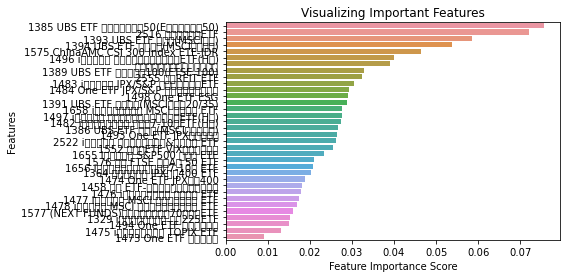

<Figure size 2160x3600 with 0 Axes>

In [54]:
#ready for making machine learning model
features = dfd
del features[-1]
x=train[features]
y=train["サイバーエージェント：翌日比"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.27)

#model making and prediction
model=RandomForestRegressor(n_estimators=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#make result score and get accuracy score
testUpDown=[]
for test in y_test:
    if test>0:
        testUpDown.append(1)
    else:
        testUpDown.append(-1)
predUpDown=[]
for pred in y_pred:
    if pred>0:
        predUpDown.append(1)
    else:
        predUpDown.append(-1)
print("確率："+str(metrics.accuracy_score(testUpDown,predUpDown)*100)+"%")

#feature evaluation and plots
feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.figure(figsize=(30,50))
plt.rcParams['font.family'] = 'IPAexGothic'
plt.show()

In [55]:
#ready for scraping
browser=webdriver.Chrome()
columnNames=[]
ETFComparisonsTable=[]
ETFfeatures = features.copy()
del ETFfeatures[-1]
for feature in ETFfeatures:
    feature=feature.split(" ")[0]

    browser.get("https://kabuoji3.com/stock/{}/".format(feature))
    stockTable=browser.find_element_by_class_name("table_wrap")
    stockLine=stockTable.find_elements_by_tag_name("tr")

    #price scraping with calculation
    if len(stockLine)==302:
        ETFComparisons=[]
        stockETFPriceAfter=stockLine[1].find_elements_by_tag_name("td")
        stockETFPriceBefore=stockLine[2].find_elements_by_tag_name("td")
        ETFComparison=float(stockETFPriceAfter[6].text)-float(stockETFPriceBefore[6].text)
        ETFComparisons.append(ETFComparison)
        ETFComparisonsTable.append(ETFComparisons)

        #pick up title
        stockTitleBox=browser.find_element_by_class_name("base_box_ttl")
        stockTitle=stockTitleBox.find_element_by_class_name("jp").text
        columnNames.append(stockTitle)

#making ETF table
ETFTable=pd.DataFrame(ETFComparisonsTable)
ETFTable=ETFTable.T
ETFTable.columns=columnNames


#date scraping and stock scraping (comparison with yesterday)
browser.get("https://kabuoji3.com/stock/{}/".format(4751))
stockTable=browser.find_element_by_class_name("table_wrap")
stockLine=stockTable.find_elements_by_tag_name("tr")

dates=[]
stockDate=stockLine[1].find_elements_by_tag_name("td")
stockDate=stockDate[0].text
dates.append(stockDate)

df_date=pd.DataFrame()
df_date["date"]=dates
df_date["year"]=df_date["date"].apply(lambda x:int(x.split("-")[0]))
df_date["month"]=df_date["date"].apply(lambda x:int(x.split("-")[1]))
df_date["day"]=df_date["date"].apply(lambda x:int(x.split("-")[2]))

targetStockComparisons=[]
targetStockPriceAfter=stockLine[1].find_elements_by_tag_name("td")
targetStockPriceBefore=stockLine[2].find_elements_by_tag_name("td")
targetStockComparison=float(targetStockPriceAfter[6].text)-float(targetStockPriceBefore[6].text)
targetStockComparisons.append(targetStockComparison)

df=pd.DataFrame(targetStockComparisons)
df.columns=["サイバーエージェント：前日比"]

#add table
stockPriceTable=pd.concat([df_date,ETFTable],axis=1)
stockPriceTable=pd.concat([stockPriceTable,df],axis=1)


#ready for future price prediction
valueX=stockPriceTable[features]
pred=model.predict(valueX)
print(pred)
#make result score and get accuracy score
predPriceUpDown="?"
if pred>0:
    predPriceUpDown="上昇"
else:
    predPriceUpDown="下落"

#telling result
resultNotification="株価予測:「4751:サイバーエージェント」\n"+stockDate+"現時点での予測値は"+str(float(targetStockPriceAfter[6].text)+float(pred))+"円。\nよって価格は"+predPriceUpDown+"見込みです。"
print(resultNotification)
browser.quit()

[-26.465]
株価予測:「4751:サイバーエージェント」
2020-12-25現時点での予測値は6933.535円。
よって価格は下落見込みです。


In [56]:
slackURL="yourid"

def send_slack(content):
    payload={
        "text":content,
        "username":"PythonStockForecast",
        "icon_emoji":":snake:"
    }
    data=json.dumps(payload)
    requests.post(slackURL,data)
send_slack(resultNotification)